In [44]:
import numpy as np
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt
from tqdm import tqdm

from datetime import datetime

In [3]:
from os import chdir
chdir("../")   # only run this ones else error will occur

In [6]:
X_train_n = np.load('private/npy/X_train_noise.npy')
X_test_n = np.load('private/npy/X_test_noise.npy')
y_train_n = np.load('private/npy/y_train_noise.npy')
y_test_n = np.load('private/npy/y_test_noise.npy')

In [38]:
def train_model_with_learning_rate(learning_rate,epoch=1):
    model_noise = models.Sequential()

    model_noise.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model_noise.add(layers.MaxPooling2D((2, 2)))

    model_noise.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_noise.add(layers.MaxPooling2D((2, 2)))

    model_noise.add(layers.Flatten())
    model_noise.add(layers.Dense(64, activation='relu'))
    model_noise.add(layers.Dense(1, activation='sigmoid'))

    model_noise.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model_noise.fit(X_train_n, y_train_n, epochs=epoch, validation_data=(X_test_n, y_test_n), batch_size=64)
    
    return history.history['val_accuracy'][-1]



In [36]:
num_lambdas = 10
min_lambda = -5  
max_lambda = -4  

# Generate random learning rates in log space
random_lambdas = np.random.uniform(min_lambda, max_lambda, num_lambdas)

learning_rates = np.sort(np.power(10, random_lambdas))


In [40]:
validation_accuracies = []
for lr in tqdm(learning_rates, desc="Training models", unit="model"):
    val_acc = train_model_with_learning_rate(lr,3)
    validation_accuracies.append(val_acc)

    if val_acc > max_accuracy:
        max_accuracy = val_acc
        best_lambda = lr


Training models:   0%|          | 0/10 [00:00<?, ?model/s]

Epoch 1/3
168/168 [==============================] - 44s 257ms/step - loss: 0.7692 - accuracy: 0.9177 - val_loss: 0.0725 - val_accuracy: 0.9727
Epoch 2/3
168/168 [==============================] - 43s 255ms/step - loss: 0.0498 - accuracy: 0.9863 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 3/3
168/168 [==============================] - 44s 262ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0289 - val_accuracy: 0.9888


Training models:  10%|█         | 1/10 [02:11<19:40, 131.19s/model]

Epoch 1/3
168/168 [==============================] - 48s 282ms/step - loss: 0.5770 - accuracy: 0.9475 - val_loss: 0.0372 - val_accuracy: 0.9873
Epoch 2/3
168/168 [==============================] - 47s 279ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0197 - val_accuracy: 0.9918
Epoch 3/3
168/168 [==============================] - 45s 265ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0160 - val_accuracy: 0.9955


Training models:  20%|██        | 2/10 [04:31<18:10, 136.30s/model]

Epoch 1/3
168/168 [==============================] - 47s 279ms/step - loss: 0.1862 - accuracy: 0.9585 - val_loss: 0.0624 - val_accuracy: 0.9750
Epoch 2/3
168/168 [==============================] - 45s 267ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoch 3/3
168/168 [==============================] - 44s 261ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.0185 - val_accuracy: 0.9925


Training models:  30%|███       | 3/10 [06:47<15:55, 136.44s/model]

Epoch 1/3
168/168 [==============================] - 44s 261ms/step - loss: 0.7332 - accuracy: 0.9420 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 2/3
168/168 [==============================] - 59s 355ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0181 - val_accuracy: 0.9922
Epoch 3/3
168/168 [==============================] - 83s 492ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0136 - val_accuracy: 0.9970


Training models:  40%|████      | 4/10 [09:54<15:39, 156.52s/model]

Epoch 1/3
168/168 [==============================] - 83s 491ms/step - loss: 0.4155 - accuracy: 0.9166 - val_loss: 0.1065 - val_accuracy: 0.9791
Epoch 2/3
168/168 [==============================] - 81s 481ms/step - loss: 0.1027 - accuracy: 0.9774 - val_loss: 0.0911 - val_accuracy: 0.9881
Epoch 3/3
168/168 [==============================] - 81s 481ms/step - loss: 0.0896 - accuracy: 0.9866 - val_loss: 0.0838 - val_accuracy: 0.9899


Training models:  50%|█████     | 5/10 [14:00<15:42, 188.54s/model]

Epoch 1/3
168/168 [==============================] - 87s 516ms/step - loss: 0.6976 - accuracy: 0.9503 - val_loss: 0.0255 - val_accuracy: 0.9892
Epoch 2/3
168/168 [==============================] - 68s 407ms/step - loss: 0.0245 - accuracy: 0.9912 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 3/3
168/168 [==============================] - 44s 262ms/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0109 - val_accuracy: 0.9970


Training models:  60%|██████    | 6/10 [17:20<12:50, 192.50s/model]

Epoch 1/3
168/168 [==============================] - 44s 257ms/step - loss: 0.9868 - accuracy: 0.9444 - val_loss: 0.0287 - val_accuracy: 0.9922
Epoch 2/3
168/168 [==============================] - 45s 265ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0176 - val_accuracy: 0.9963
Epoch 3/3
168/168 [==============================] - 44s 263ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0157 - val_accuracy: 0.9966


Training models:  70%|███████   | 7/10 [19:34<08:39, 173.24s/model]

Epoch 1/3
168/168 [==============================] - 46s 264ms/step - loss: 1.1818 - accuracy: 0.9240 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 2/3
168/168 [==============================] - 44s 263ms/step - loss: 0.0922 - accuracy: 0.9860 - val_loss: 0.0910 - val_accuracy: 0.9948
Epoch 3/3
168/168 [==============================] - 44s 260ms/step - loss: 0.0839 - accuracy: 0.9907 - val_loss: 0.0983 - val_accuracy: 0.9783


Training models:  80%|████████  | 8/10 [21:48<05:22, 161.04s/model]

Epoch 1/3
168/168 [==============================] - 44s 258ms/step - loss: 0.5975 - accuracy: 0.9757 - val_loss: 0.0199 - val_accuracy: 0.9944
Epoch 2/3
168/168 [==============================] - 45s 269ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9970
Epoch 3/3
168/168 [==============================] - 43s 258ms/step - loss: 0.0075 - accuracy: 0.9967 - val_loss: 0.0189 - val_accuracy: 0.9955


Training models:  90%|█████████ | 9/10 [24:01<02:32, 152.22s/model]

Epoch 1/3
168/168 [==============================] - 43s 255ms/step - loss: 11.3929 - accuracy: 0.9317 - val_loss: 0.0395 - val_accuracy: 0.9851
Epoch 2/3
168/168 [==============================] - 44s 259ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 3/3
168/168 [==============================] - 42s 247ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.0346 - val_accuracy: 0.9929


Training models: 100%|██████████| 10/10 [26:10<00:00, 157.08s/model]


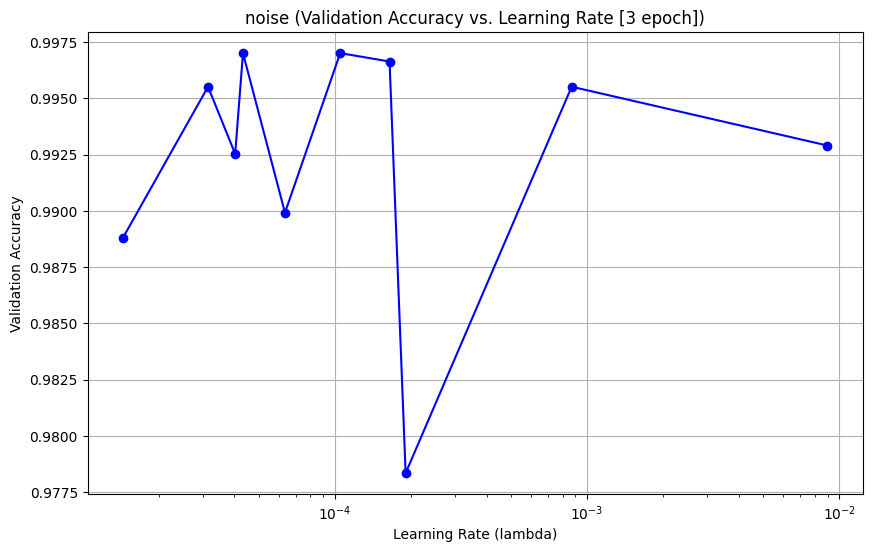

In [50]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, validation_accuracies, 'bo-')
plt.xscale('log')
plt.xlabel('Learning Rate (lambda)')
plt.ylabel('Validation Accuracy')
plt.title('noise (Validation Accuracy vs. Learning Rate [3 epoch])')
plt.grid(True)

# Save graph with timestamp in the filename
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)


In [ ]:
print("Lambda with highest accuracy:", best_lambda)